In [1]:
# Importação das bibliotecas necessárias
import heapq  # Fila de prioridade
import networkx as nx  # Criação e manipulação de grafos
import matplotlib.pyplot as plt  # Visualização dos grafos


# Definição do mapa com os locais e as distâncias entre eles
mapa = {
    "Base Central": {"Zona Norte": 10, "Lago Azul": 4, "Ponto Secundário": 6},
    "Zona Norte": {"Mata Alta": 7, "Base Central": 10, "Mirante": 5},
    "Mata Alta": {"Zona Norte": 7, "Lago Verde": 6, "Estação Leste": 8},
    "Lago Azul": {"Base Central": 4, "Lago Verde": 3, "Mirante": 9},
    "Lago Verde": {"Lago Azul": 3, "Mata Alta": 6, "Estação Leste": 5},
    "Ponto Secundário": {"Base Central": 6, "Lago Azul": 7},
    "Mirante": {"Zona Norte": 5, "Lago Azul": 9},
    "Estação Leste": {"Mata Alta": 8, "Lago Verde": 5}
}

# Definindo os locais que são lagos
lagos = {"Lago Azul", "Lago Verde"}

# Lista de chamadas de emergência simuladas
chamadas = [
    { "id": 1, "local": "Zona Norte", "severidade": 4, "tipo_vegetacao": "cerrado", "clima": "seco" },
    { "id": 2, "local": "Mata Alta", "severidade": 5, "tipo_vegetacao": "pantanal", "clima": "seco" },
    { "id": 3, "local": "Lago Verde", "severidade": 3, "tipo_vegetacao": "mata_atlantica", "clima": "úmido" },
    { "id": 4, "local": "Lago Azul", "severidade": 5, "tipo_vegetacao": "pantanal", "clima": "seco" },
    { "id": 5, "local": "Mata Alta", "severidade": 2, "tipo_vegetacao": "cerrado", "clima": "úmido" },
    { "id": 6, "local": "Estação Leste", "severidade": 4, "tipo_vegetacao": "mata_atlantica", "clima": "seco" },
    { "id": 7, "local": "Mirante", "severidade": 3, "tipo_vegetacao": "cerrado", "clima": "úmido" },
    { "id": 8, "local": "Ponto Secundário", "severidade": 5, "tipo_vegetacao": "pantanal", "clima": "muito seco" }
]

#Pesos atribuídos de acordo com o tipo de vegetação
pesos_vegetacao = {
    "cerrado": 1.2,
    "mata_atlantica": 1.5,
    "pantanal": 2.0
}


In [2]:
# Função para calcular o menor caminho entre dois pontos usando Dijkstra
def dijkstra(mapa, origem, destino):
    fila = [(0, origem, [origem])] # (custo, local_atual, caminho_atual)
    visitados = set()

    while fila:
        (custo, atual, caminho) = heapq.heappop(fila) # Retira o menor custo da fila
        if atual == destino:
            return caminho, custo # Retorna o caminho e o custo final
        if atual in visitados:
            continue
        visitados.add(atual)

        for vizinho, peso in mapa.get(atual, {}).items():
            if vizinho not in visitados:
                heapq.heappush(fila, (custo + peso, vizinho, caminho + [vizinho]))

    return [], float('inf') # Retorna vazio se não houver caminho

# Calcula o menor caminho passando obrigatoriamente por um dos lagos
def calcular_menor_caminho_com_lago(mapa, origem, destino, lagos):
    melhores_rotas = []
    for lago in lagos:
        rota_1, dist_1 = dijkstra(mapa, origem, lago)  # Da origem até o lago
        rota_2, dist_2 = dijkstra(mapa, lago, destino)  # Do lago até o destino
        if rota_1 and rota_2:
            rota_completa = rota_1[:-1] + rota_2 # Junta os dois caminhos
            total = dist_1 + dist_2
            melhores_rotas.append((rota_completa, total))

    if not melhores_rotas:
        return [], float('inf')

    return min(melhores_rotas, key=lambda x: x[1]) # Retorna o caminho com menor custo total


# Função que desenha o grafo com a rota destacada
def desenhar_grafo_com_rota(mapa, rota=None):
    G = nx.Graph()
    posicoes = {
        "Base Central": (0, 0),
        "Zona Norte": (0, 2),
        "Mata Alta": (2, 3),
        "Lago Azul": (-2, -1),
        "Lago Verde": (2, 0),
        "Ponto Secundário": (-1, -2),
        "Mirante": (-1, 2),
        "Estação Leste": (3, 2)
    }

     # Criação das conexões no grafo
    for origem, vizinhos in mapa.items():
        for destino, peso in vizinhos.items():
            G.add_edge(origem, destino, weight=peso)

    # Definição das cores das arestas (destaca a rota)
    edge_colors = []
    rota_edges = list(zip(rota, rota[1:])) if rota else []

    for edge in G.edges():
        if edge in rota_edges or edge[::-1] in rota_edges:
            edge_colors.append("red") # Aresta da rota fica vermelha
        else:
            edge_colors.append("gray") # As demais ficam cinzas

    # Desenho do grafo
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos=posicoes, with_labels=True, node_color='lightblue',
            edge_color=edge_colors, width=2, node_size=1800, font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=posicoes, edge_labels=edge_labels)
    if rota:
        plt.title("Rota de Atendimento (em vermelho)")
    else:
        plt.title("Mapa da Região")
    plt.axis('off')
    plt.show()


# Calcula a prioridade de uma chamada
def calcular_prioridade(chamada, peso_vegetacao):
    prioridade = chamada["severidade"] * peso_vegetacao.get(chamada["tipo_vegetacao"], 1)
    return prioridade


🆘 Atendendo ocorrência ID 2
🔺 Prioridade: 10.0
🗺️ Rota (via lago obrigatório): ['Base Central', 'Lago Azul', 'Lago Verde', 'Mata Alta']
⏱️ Tempo estimado: 13
--------------------------------------------------


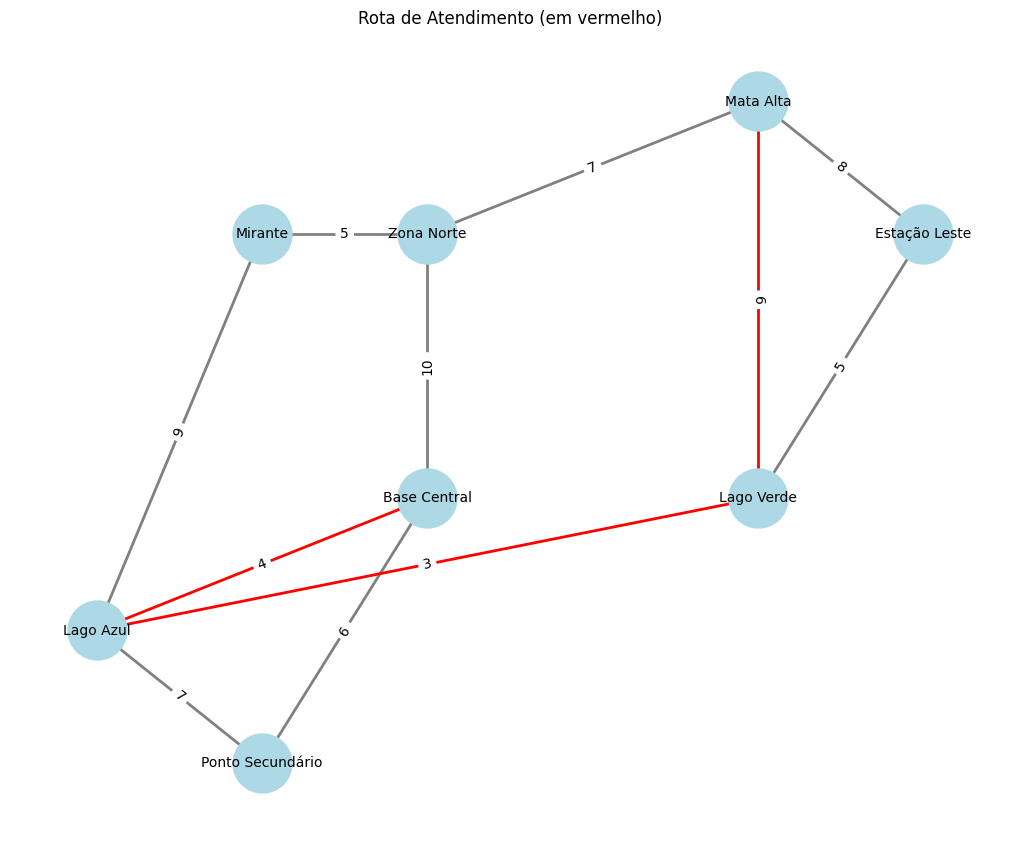

🆘 Atendendo ocorrência ID 4
🔺 Prioridade: 10.0
🗺️ Rota (via lago obrigatório): ['Base Central', 'Lago Azul']
⏱️ Tempo estimado: 4
--------------------------------------------------


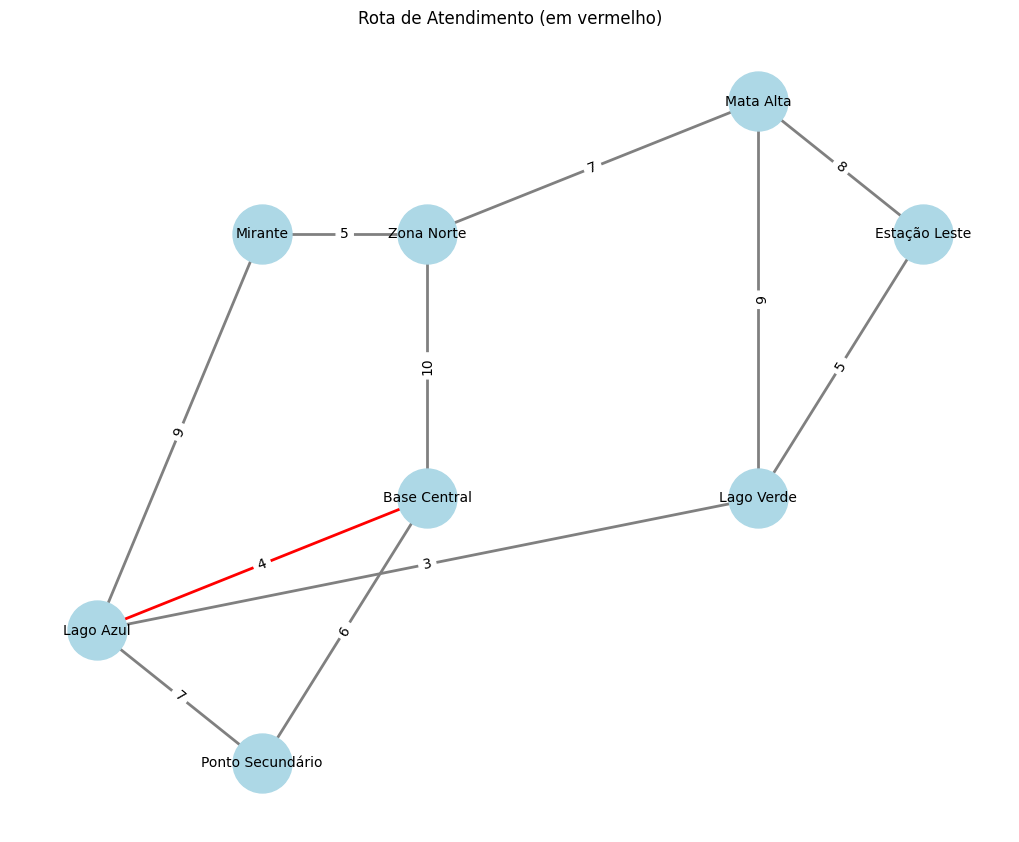

🆘 Atendendo ocorrência ID 8
🔺 Prioridade: 10.0
🗺️ Rota (via lago obrigatório): ['Base Central', 'Lago Azul', 'Base Central', 'Ponto Secundário']
⏱️ Tempo estimado: 14
--------------------------------------------------


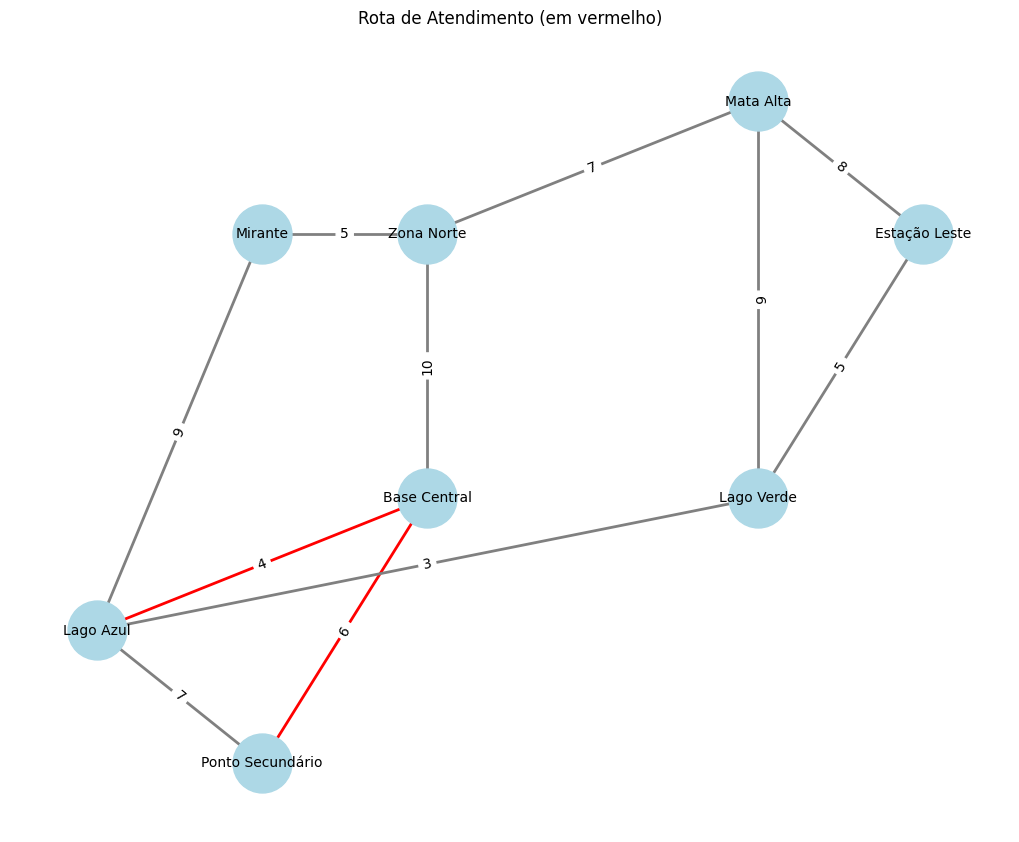

🆘 Atendendo ocorrência ID 6
🔺 Prioridade: 6.0
🗺️ Rota (via lago obrigatório): ['Base Central', 'Lago Azul', 'Lago Verde', 'Estação Leste']
⏱️ Tempo estimado: 12
--------------------------------------------------


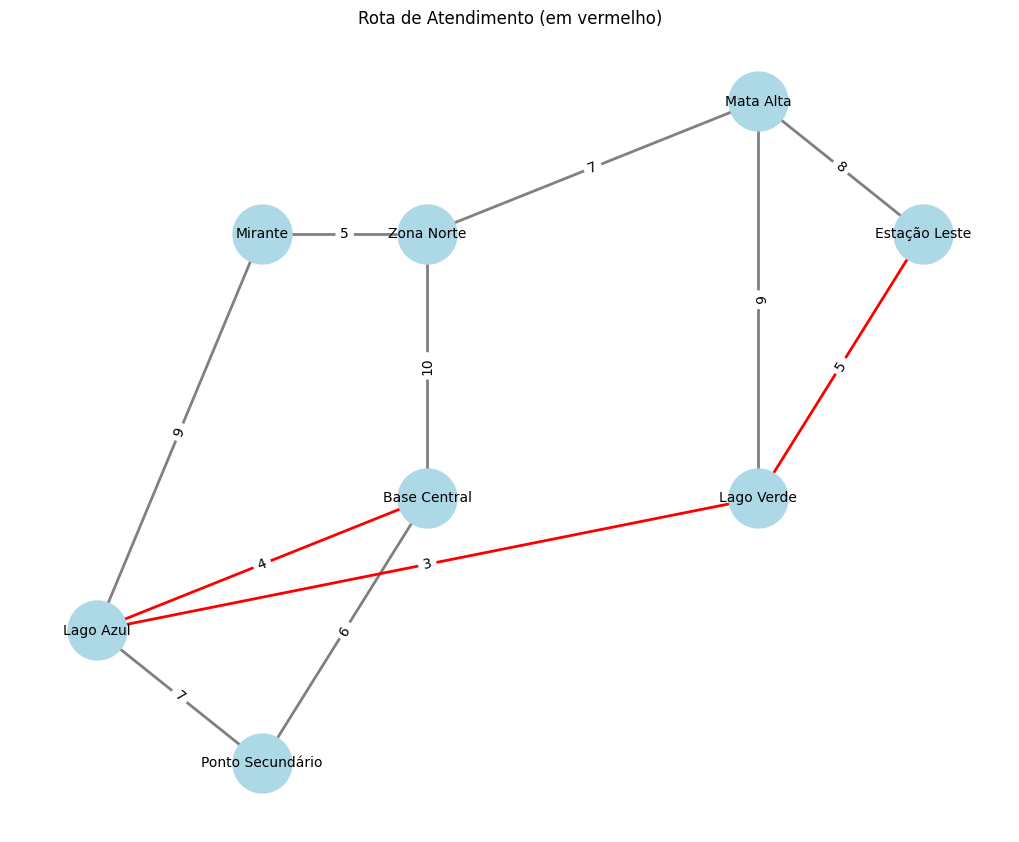

🆘 Atendendo ocorrência ID 1
🔺 Prioridade: 4.8
🗺️ Rota (via lago obrigatório): ['Base Central', 'Lago Azul', 'Base Central', 'Zona Norte']
⏱️ Tempo estimado: 18
--------------------------------------------------


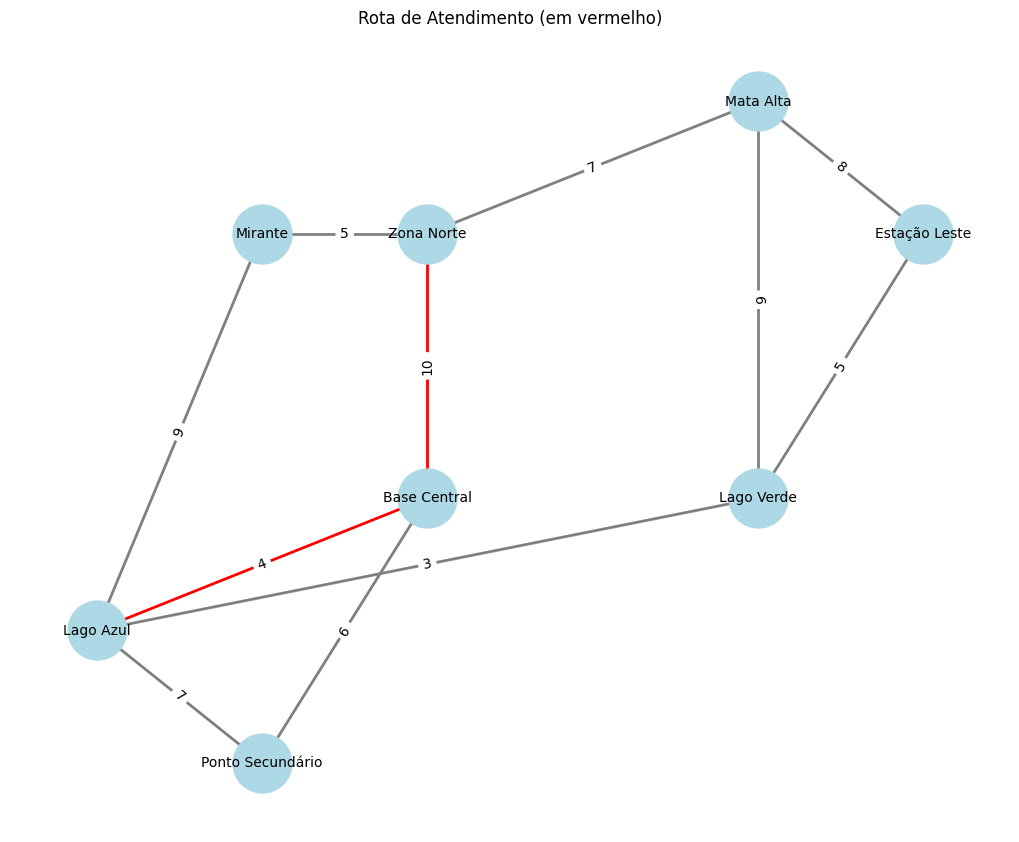

🆘 Atendendo ocorrência ID 3
🔺 Prioridade: 4.5
🗺️ Rota (via lago obrigatório): ['Base Central', 'Lago Azul', 'Lago Verde']
⏱️ Tempo estimado: 7
--------------------------------------------------


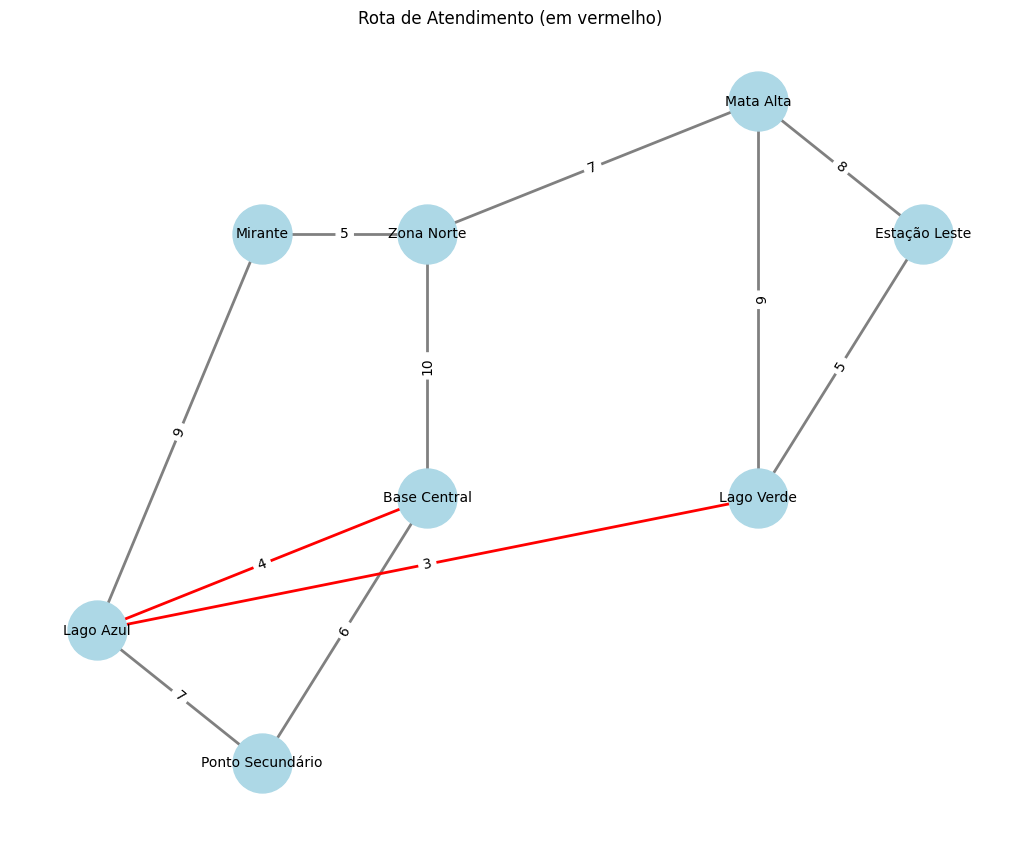

🆘 Atendendo ocorrência ID 7
🔺 Prioridade: 3.5999999999999996
🗺️ Rota (via lago obrigatório): ['Base Central', 'Lago Azul', 'Mirante']
⏱️ Tempo estimado: 13
--------------------------------------------------


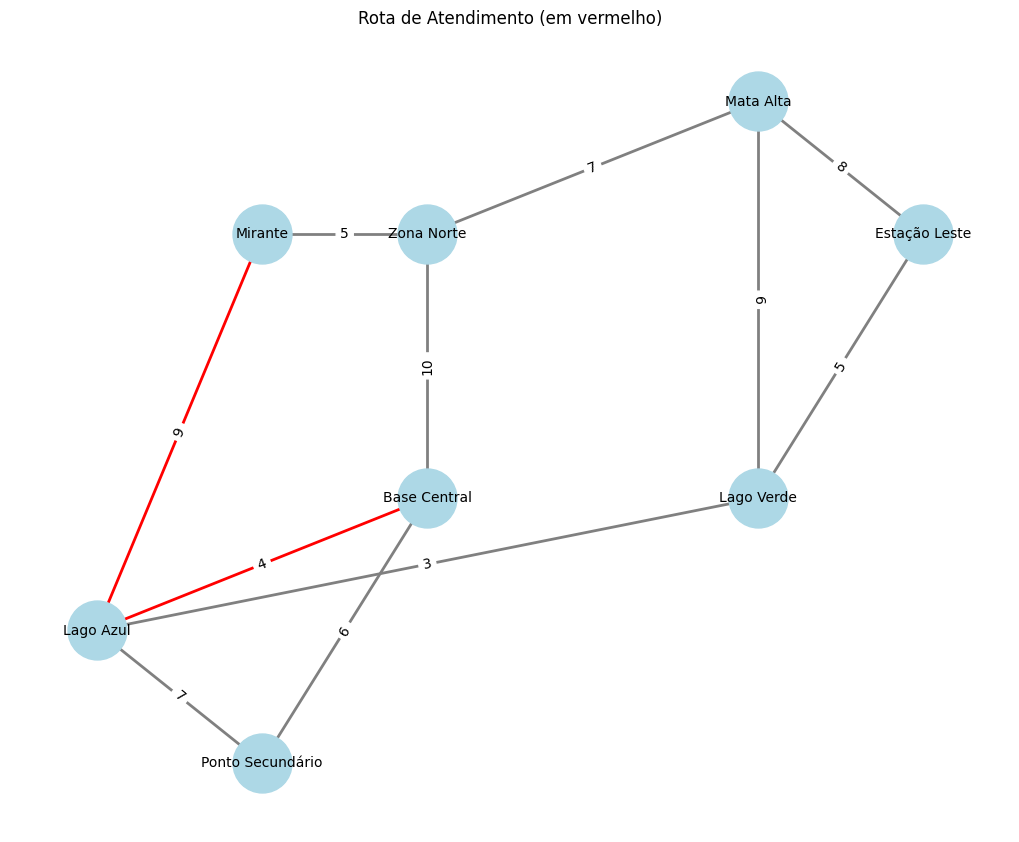

🆘 Atendendo ocorrência ID 5
🔺 Prioridade: 2.4
🗺️ Rota (via lago obrigatório): ['Base Central', 'Lago Azul', 'Lago Verde', 'Mata Alta']
⏱️ Tempo estimado: 13
--------------------------------------------------


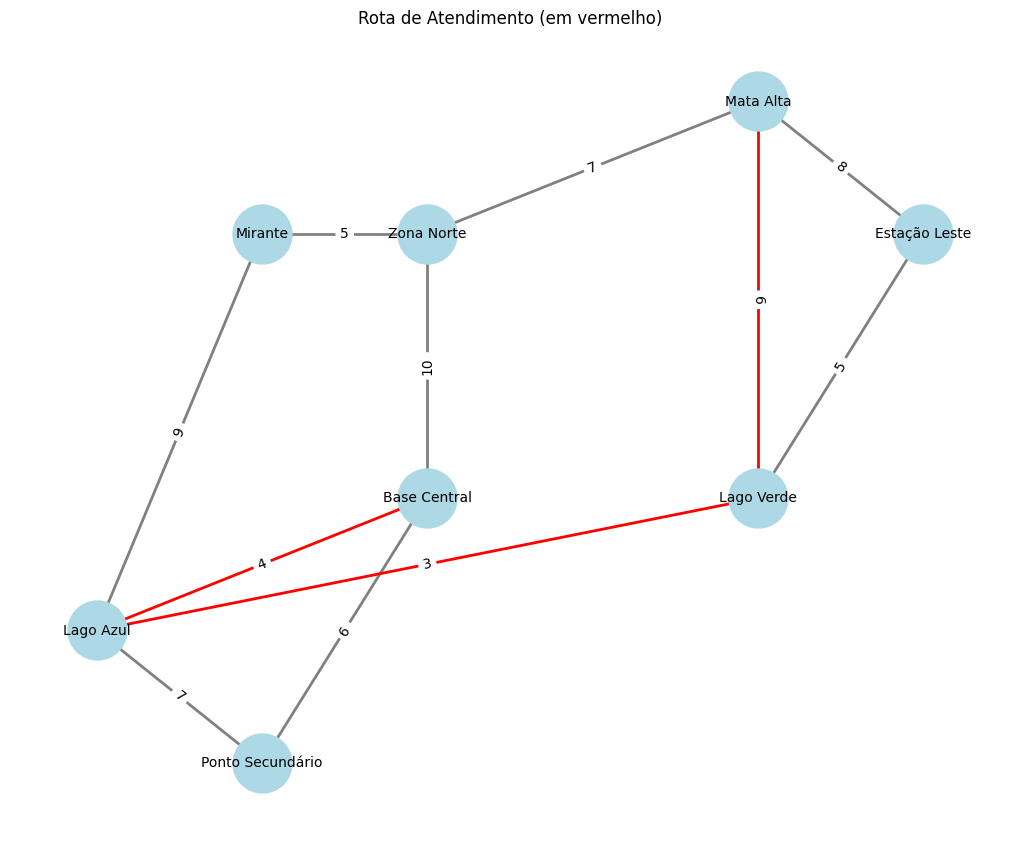

In [3]:

# Criação da fila de prioridade
fila_prioridade = []
for chamada in chamadas:
    prioridade = calcular_prioridade(chamada, pesos_vegetacao)
    heapq.heappush(fila_prioridade, (-prioridade, chamada["id"], chamada))   # Negativo para inverter e pegar maior primeiro

# Processamento das chamadas na ordem de prioridade
while fila_prioridade:
    _, _, chamada = heapq.heappop(fila_prioridade)
    origem = "Base Central"
    destino = chamada["local"]

    # Calcula a melhor rota passando por um lago
    rota, tempo = calcular_menor_caminho_com_lago(mapa, origem, destino, lagos)


    # Exibe as informações da ocorrência
    print(f"🆘 Atendendo ocorrência ID {chamada['id']}")
    print(f"🔺 Prioridade: {calcular_prioridade(chamada, pesos_vegetacao)}")
    print(f"🗺️ Rota (via lago obrigatório): {rota}")
    print(f"⏱️ Tempo estimado: {tempo}")
    print("-" * 50)

    # Desenha o mapa com a rota destacada
    desenhar_grafo_com_rota(mapa, rota)